# Bussines case

## Tesla  stock case


## Introduction

We will be using the stock data set. This data set contains various opening and closing value,highest and lowest value,date and adjusted closing value. It also contains a volume of stock and date. The name of the file is `Stock.csv`.


In [37]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
 
import warnings
warnings.filterwarnings('ignore')

For this lab, we will be using the following libraries:

pandasPandas – This library helps to load the data frame in a 2D array format and has multiple functions to perform analysis tasks in one go.

Numpy – Numpy arrays are very fast and can perform large computations in a very short time.

Matplotlib/Seaborn – This library is used to draw visualizations.

Sklearn – This module contains multiple libraries having pre-implemented functions to perform tasks from data preprocessing to model development and evaluation.

XGBoost – This contains the eXtreme Gradient Boosting machine learning algorithm which is one of the algorithms which helps us to achieve high accuracy on predictions.

## **Reading and understanding our data**


In [38]:
### BEGIN SOLUTION
data = pd.read_csv("/Users/mertdil/Downloads/TSLA.csv", sep=',')

In [39]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [40]:
data.shape

(2416, 7)

From this, we got to know that there are 2416 rows of data available and for each row, we have 7 different features or columns.

In [41]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


According to the output above, we have 1593 entries or rows, as well as 7 features. The "Non-Null Count" column shows the number of non-null entries.  If the count is 1593 then there is no missing values for that particular feature. The 'close' is our target, or response variable, and the rest of the features are our predictor variables.

We also have a mix of numerical (1 int64 and 4 float64 ) and object data types (2 object).

The `describe()` function will provide the statistical information about all numeric values.

In [43]:
data["Open"]

0        19.000000
1        25.790001
2        25.000000
3        23.000000
4        20.000000
           ...    
2411    568.489990
2412    575.690002
2413    632.419983
2414    640.000000
2415    673.690002
Name: Open, Length: 2416, dtype: float64

We have errors in data that is Open column have non numberic variables:"a291.5299988" and have null variables. We need to do data cleaning.

In [44]:
data["High"]

0        25.000000
1        30.420000
2        25.920000
3        23.100000
4        20.000000
           ...    
2411    576.809998
2412    589.799988
2413    650.880005
2414    653.000000
2415    786.140015
Name: High, Length: 2416, dtype: float64

In [45]:
data["Adj Close"]

0        23.889999
1        23.830000
2        21.959999
3        19.200001
4        16.110001
           ...    
2411    566.900024
2412    580.989990
2413    640.809998
2414    650.570007
2415    780.000000
Name: Adj Close, Length: 2416, dtype: float64

In [46]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


we have errors in data that is High and Adj Close column have mean error.This columns have some low quality datas. We need to do data cleaning.

## **Data Cleaning and Wrangling**
Here, we will check if we have any missing values.

In [47]:
import pandas as pd

def convert_to_float(data, column_name):
    try:
        data[column_name] = data[column_name].astype(float)
    except ValueError:
        # If ValueError error is received, replace only non-numeric cells with "NaN" values
        data[column_name] = pd.to_numeric(data[column_name], errors='coerce')
        
    return data


Converts the specified column in the given data frame to type "float".
Converts cells containing numeric values in data of type "object" to type "float".

In [48]:
#convert_to_float(data, "Open")

We have prepared a function to make our string value in object form float. Our open value must be in float form for the model

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [50]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


For outlier values that are below the average, we use the quantile method.

In [51]:
####Quantile operation to be performed if the density intensities are corrupted in the data
q1 = data['High'].quantile(0.25)
q3 = data['High'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# 'B' sütunundaki aykırı değerleri 'mean' yerine 'median' ile değiştir
#median = data['High'].median()
#data.loc[data['High'] > upper_bound, 'High'] = median
#data.loc[data['High'] < lower_bound, 'High'] = median

# describe() yöntemi kullanarak güncellenmiş sütun istatistiklerini görüntüle
q1 = data['Adj Close'].quantile(0.25)
q3 = data['Adj Close'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# 'B' sütunundaki aykırı değerleri 'mean' yerine 'median' ile değiştir
#median = data['Adj Close'].median()
#data.loc[data['Adj Close'] > upper_bound, 'Adj Close'] = median
#data.loc[data['Adj Close'] < lower_bound, 'Adj Close'] = median

# describe() yöntemi kullanarak güncellenmiş sütun istatistiklerini görüntüle

data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [52]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Now that we have found some null points, we need to either remove them from our dataset or fill them with something else. In this case, we will use `fillna()` and `method='ffill'`, which fills the last observed non-null value forward until another non-null value is encountered.

In [53]:
data = data.fillna(method='ffill')

In [54]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## **Exploratory Data Analysis**
EDA is an approach to analyzing the data using visual techniques. It is used to discover trends, and patterns, or to check assumptions with the help of statistical summaries and graphical representations. 
While performing the EDA of the  Stock Price data we will analyze how prices of the stock have moved over the period of time and how the end of the quarters affects the prices of the stock.

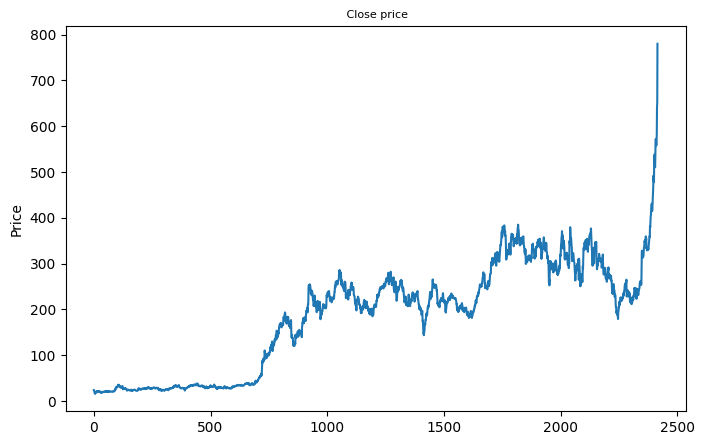

In [55]:
plt.figure(figsize=(8,5))
plt.plot(data['Close'])
plt.title(' Close price', fontsize=8)
plt.ylabel('Price')
plt.show()

The prices of stocks are showing an upward trend as depicted by the plot of the closing price of the stocks.

In [56]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [57]:
print(data[data['Close'] == data['Adj Close']].shape)

(2416, 7)


From here we can conclude that all the rows of columns ‘Close’ and ‘Adj Close’ have the same data. So, having redundant data in the dataset is not going to help so, we’ll drop this column before further analysis.

In [58]:
data = data.drop(['Adj Close'], axis=1)

Now let’s draw the distribution plot for the continuous features given in the dataset.

Before moving further let’s check for the null values if any are present in the data frame.

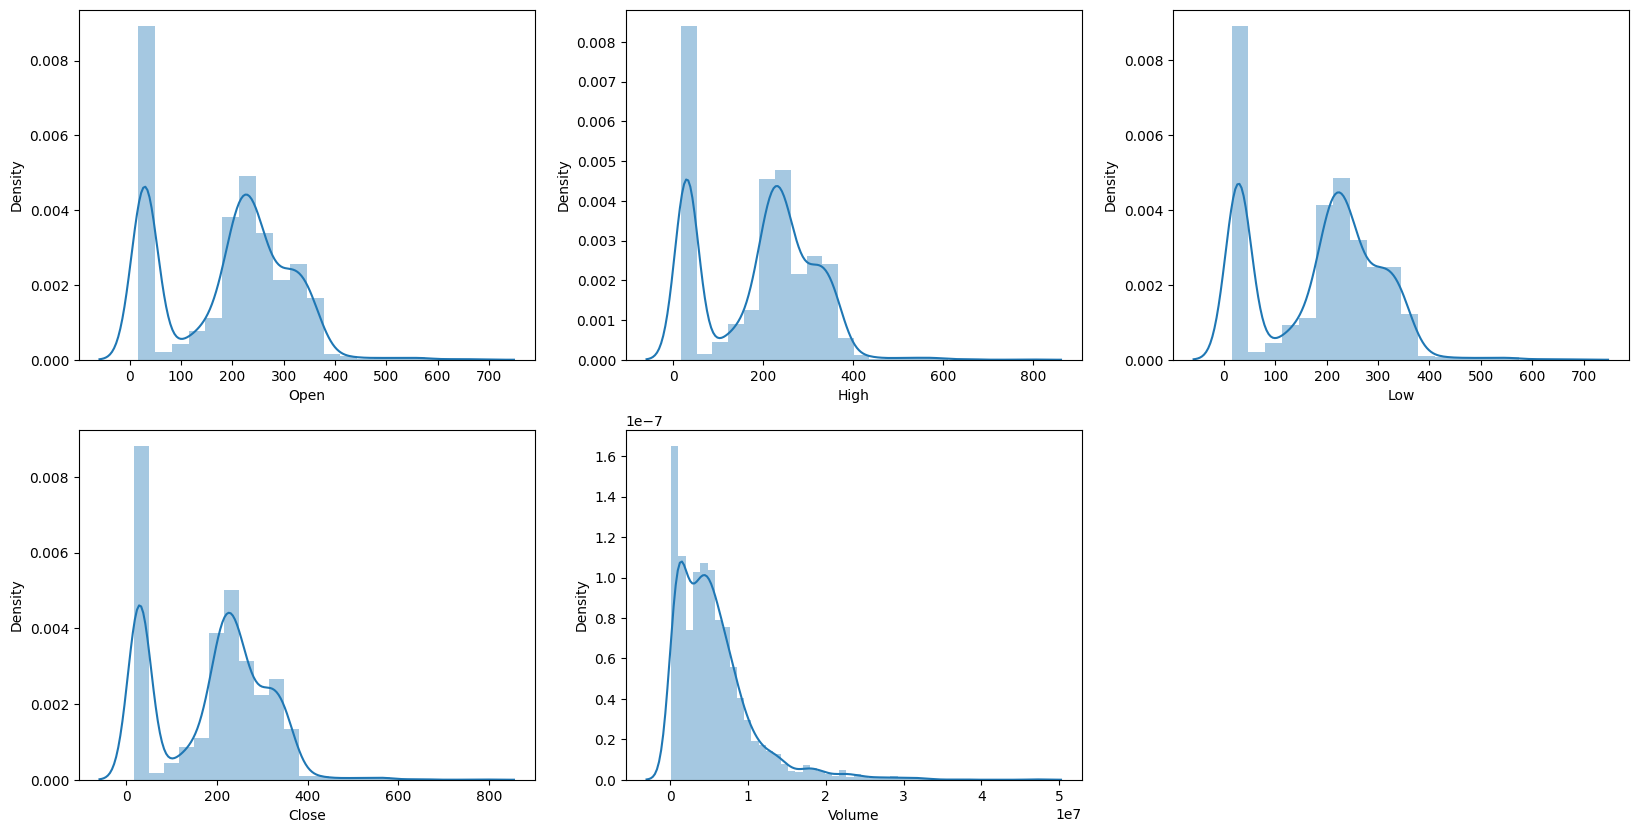

In [59]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
 
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(data[col])
plt.show()

In the distribution plot of OHLC data, we can see two peaks which means the data has varied significantly in two regions. And the Volume data is left-skewed.

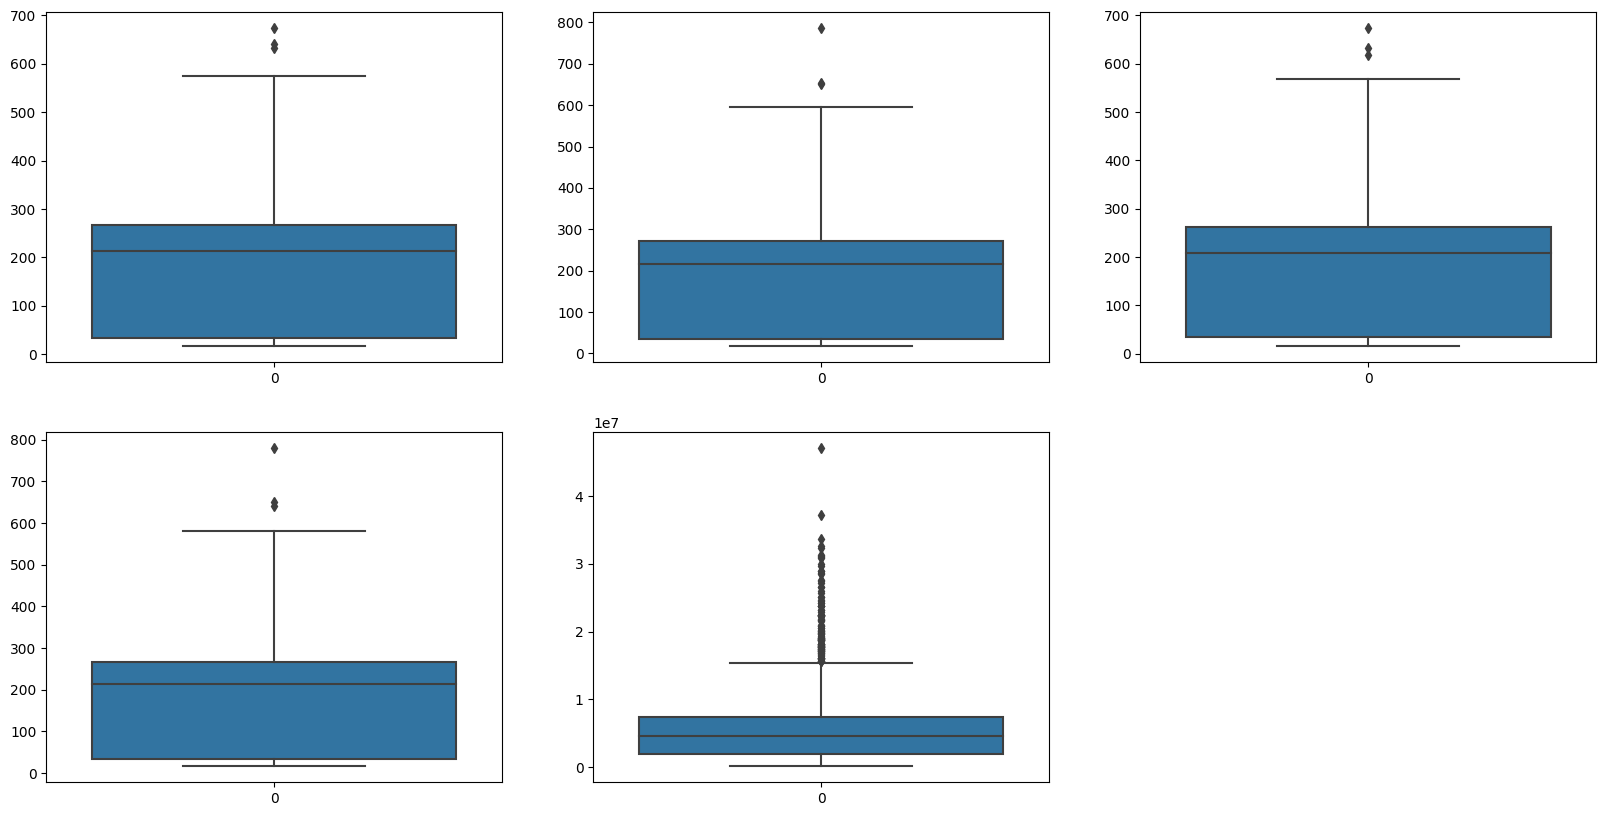

In [60]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(data[col])
plt.show()

From the above boxplots, we can conclude that  volume data contains outliers in it but the data in the rest of the columns are free from any outlier.

## **Feature Engineering**
Feature Engineering helps to derive some valuable features from the existing ones. These extra features sometimes help in increasing the performance of the model significantly and certainly help to gain deeper insights into the data.

In [61]:
data

,Date,Open,High,Low,Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,6866900
...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,15719300


In [62]:
splitted = data['Date'].str.split('-', expand=True)
data['year'] = splitted[0].astype('int')
data['month'] = splitted[1].astype('int')
data['day'] = splitted[2].astype('int')

data.head()
 

,Date,Open,High,Low,Close,Volume,year,month,day
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,2010,6,29
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,2010,6,30
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,2010,7,1
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2010,7,2
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,2010,7,6


Now we have three more columns namely ‘day’, ‘month’ and ‘year’ all these three have been derived from the ‘Date’ column which was initially provided in the data.

In [63]:
data['is_quarter_end'] = np.where(data['month']%3==0,1,0)
data.head()

,Date,Open,High,Low,Close,Volume,year,month,day,is_quarter_end
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,2010,6,29,1
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,2010,6,30,1
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,2010,7,1,0
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2010,7,2,0
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,2010,7,6,0


A quarter is defined as a group of three months. Every company prepares its quarterly results and publishes them publicly so, that people can analyze the company’s performance. These quarterly results affect the stock prices heavily which is why we have added this feature because this can be a helpful feature for the learning model.

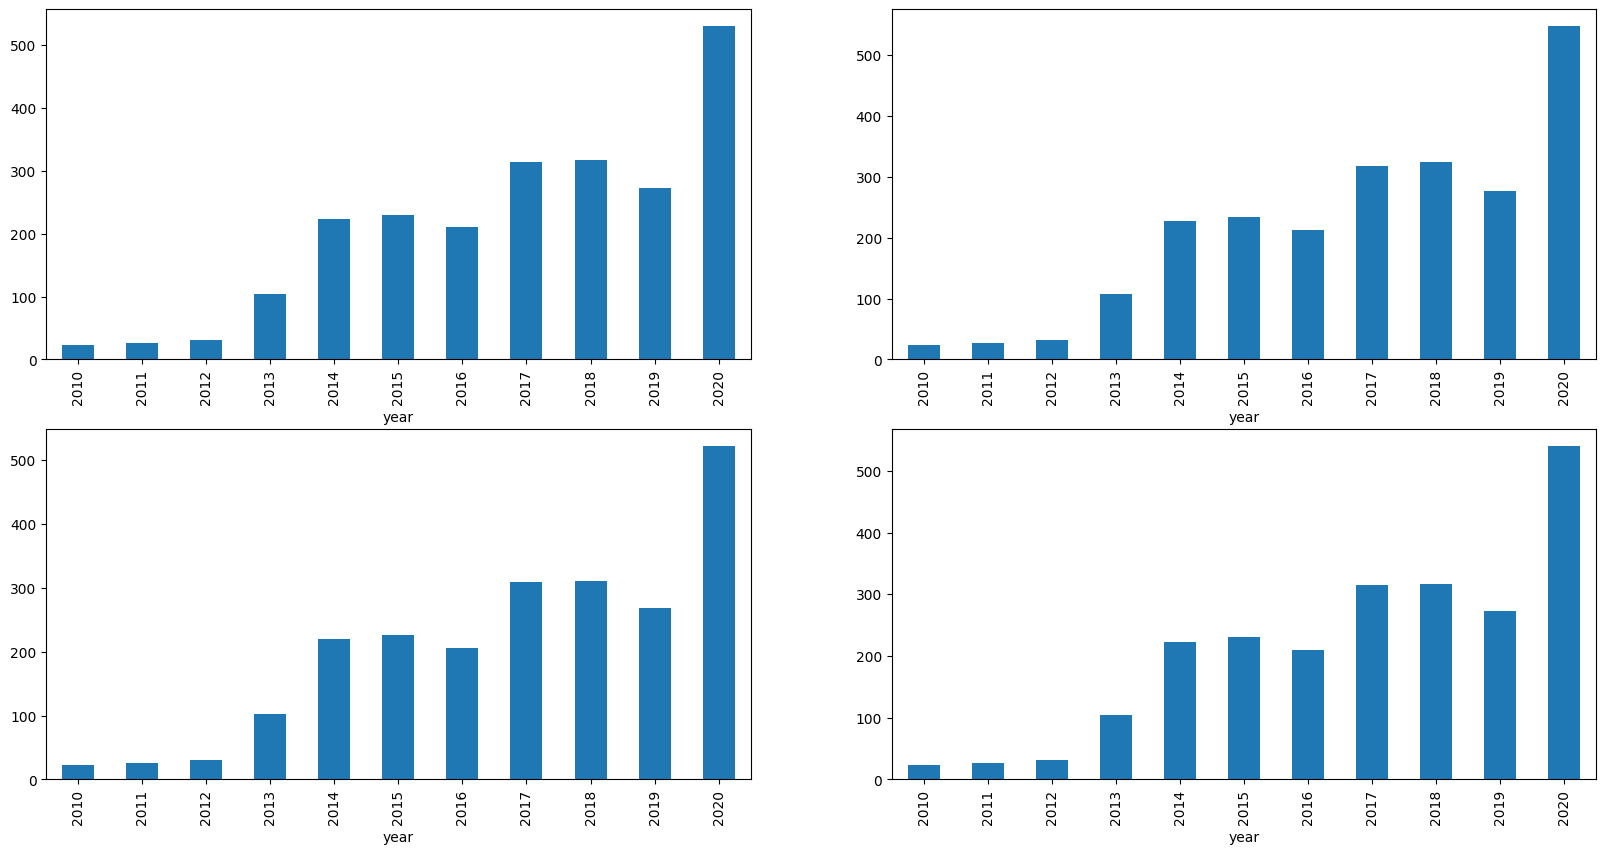

In [64]:
data_grouped = data.groupby('year').mean()
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(['Open','High','Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

From the above bar graph, we can conclude that the stock prices have doubled from the year 2013 to that in 2014.

In [65]:
data.groupby('is_quarter_end').mean()

,Open,High,Low,Close,Volume,year,month,day
is_quarter_end,,,,,,,,
0,185.875081,189.254226,182.449499,186.085081,5.767062e+06,2014.816213,6.173886,15.710396
1,187.071200,190.232700,183.860262,187.047163,5.180154e+06,2014.697500,7.597500,15.825000


Here are some of the important observations of the above-grouped data:

Prices are higher in the months which are quarter end as compared to that of the non-quarter end months.
The volume of trades is lower in the months which are quarter end.

In [66]:
data['open-close']  = data['Open'] - data['Close']
data['low-high']  = data['Low'] - data['High']
data['target'] = np.where(data['Close'].shift(-1) > data['Close'], 1, 0)

Above we have added some more columns which will help in the training of our model. We have added the target feature which is a signal whether to buy or not we will train our model to predict this only. But before proceeding let’s check whether the target is balanced or not using a pie chart.

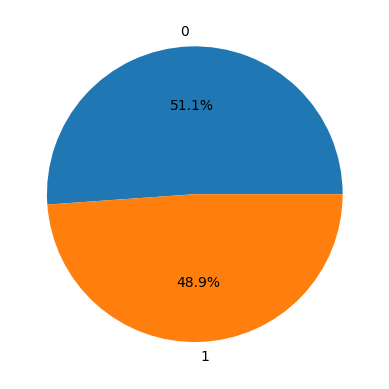

In [67]:
plt.pie(data['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

we have %46.1 targeted values in our data set


When we add features to our dataset we have to ensure that there are no highly correlated features as they do not help in the learning process of the algorithm

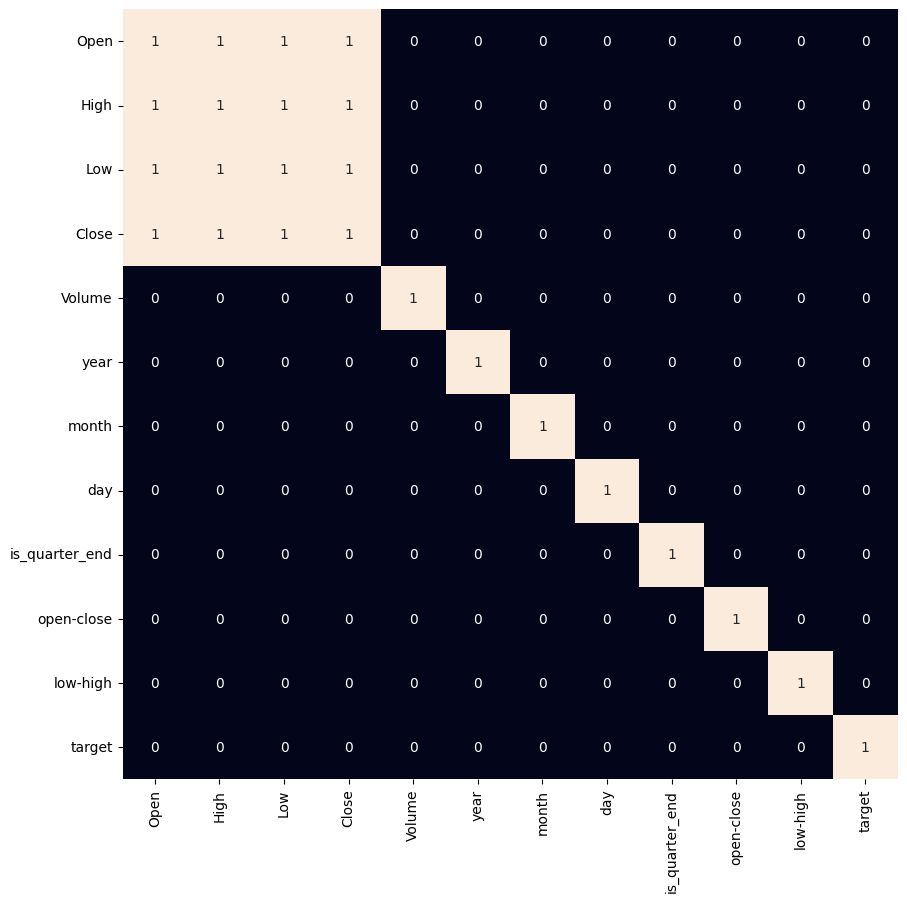

In [68]:
plt.figure(figsize=(10, 10))
 
# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(data.corr() > 0.9, annot=True, cbar=False)
plt.show()

From the heatmap above, we can tell that there is a high correlation between OHLC, which is quite clear, and the added features are not highly correlated with each other or with the previously provided features, which means that we are ready to build our model.

## **Data Splitting and Normalization**


In [69]:
features = data[['open-close', 'low-high', 'is_quarter_end']]
target = data['target']
 
scaler = StandardScaler()
features = scaler.fit_transform(features)
 
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(2174, 3) (242, 3)


After selecting the features to train the model on we should normalize the data because normalized data leads to stable and fast training of the model. After that whole data has been split into two parts with a 90/10 ratio so, that we can evaluate the performance of our model on unseen data.

## **Model Development and Evaluation**
Now is the time to train some state-of-the-art machine learning models(Logistic Regression, Support Vector Machine, XGBClassifier), and then based on their performance on the training and validation data we will choose which ML model is serving the purpose at hand better.

For the evaluation metric, we will use the ROC-AUC curve but why this is because instead of predicting the hard probability that is 0 or 1 we would like it to predict soft probabilities that are continuous values between 0 to 1. And with soft probabilities, the ROC-AUC curve is generally used to measure the accuracy of the predictions.

In [70]:
models = [LogisticRegression(), SVC(
  kernel='poly', probability=True), XGBClassifier()]
 
for i in range(3):
  models[i].fit(X_train, Y_train)
 
  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.5228802330060918
Validation Accuracy :  0.4923371647509579

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.5294572363547078
Validation Accuracy :  0.4625068418171866

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) : 
Training Accura

Among the three models, we have trained XGBClassifier has the highest performance but it is pruned to overfitting as the difference between the training and the validation accuracy is too high. But in the case of the Logistic Regression, this is not the case.

Now let’s plot a confusion matrix for the validation data.

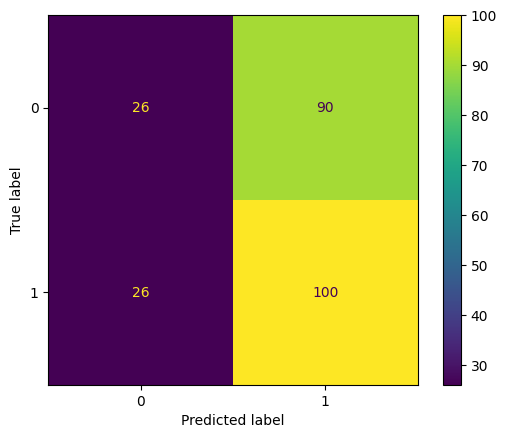

In [73]:

metrics.plot_confusion_matrix(models[0], X_valid, Y_valid)
plt.show()


## **Conclusion**
We can observe that the accuracy achieved by the state-of-the-art ML model is no better than simply guessing with a probability of 60%. Possible reasons for this may be the lack of data or using a very simple model to perform such a complex task as Stock Market prediction.